In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
from textblob import TextBlob 
import io
from wordcloud import WordCloud
import re

In [1]:
from google.colab import files
uploaded = files.upload()

Saving apple_final2.csv to apple_final2.csv


In [7]:
df = pd.read_csv(io.BytesIO(uploaded['apple_final2.csv'])) 
df = df.iloc[1:]
print(df)

     Unnamed: 0       Date  sentiment_value  yesterday_sentiment       Open  \
1             1   1/5/2015         1.014909             4.943019  27.072500   
2             2   1/6/2015         2.509605             1.014909  26.635000   
3             3   1/7/2015         3.265148             2.509605  26.799999   
4             4   1/8/2015         8.972554             3.265148  27.307501   
5             5   1/9/2015         8.830087             8.972554  28.167500   
..          ...        ...              ...                  ...        ...   
807         807  3/22/2018         6.657773             5.250375  42.500000   
808         808  3/23/2018         3.560382             6.657773  42.097500   
809         809  3/26/2018         9.615179             3.560382  42.017502   
810         810  3/27/2018         4.131726             9.615179  43.419998   
811         811  3/28/2018         3.502371             4.131726  41.812500   

          High        Low      Close     Volume   a

In [92]:
def score(predict,actual):
  predict = predict.to_numpy(predict)
  actual = actual.to_numpy(actual)
  s=0
  pred=[]
  act=[]
  for i in range(1,len(predict)):
    # if (predict[i] - actual[i-1])*(actual[i]*actual[i-1]) >= 0:
    #   s += 1
    #   pred.append(1)
    #   act.append(1)
      if predict[i]>=predict[i-1] and actual[i]>=actual[i-1]:
          s+=1
          pred.append(1)
          act.append(1)
      elif predict[i]<predict[i-1] and actual[i]<actual[i-1]:
          s+=1
          pred.append(0)
          act.append(0)
      elif predict[i]<predict[i-1] and actual[i]>=actual[i-1]:
          pred.append(0)
          act.append(1)
      else:
          pred.append(1)
          act.append(0)
  return s/(len(predict)-1)

In [141]:
def rmse(y1, y_cap):
  y1 = y1.to_numpy(y1)
  y_cap = y_cap.to_numpy(y_cap)
  y_cap = y_cap.reshape((y1.shape[0], 1))
  residual = y1 - y_cap
  np.reshape(y, (y.size,1))
  np.reshape(y_cap, (y_cap.size,1))
  sum = np.matmul(residual.T,residual)/(len(y1))
  sum = np.sqrt(sum)
  return sum 


In [130]:
x = df[['sentiment_value', 'yesterday_sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']]
y = df[['avgprice']]

In [131]:
df2 = x
df2 = pd.DataFrame(df2)     
future_days = 50
df2['Prediction'] = df['avgprice'].shift(-future_days)
df2


,sentiment_value,yesterday_sentiment,Open,High,Low,Close,Volume,Prediction
1,1.014909,4.943019,27.072500,27.162500,26.352501,26.562500,257142000,31.941251
2,2.509605,1.014909,26.635000,26.857500,26.157499,26.565001,263188400,32.081250
3,3.265148,2.509605,26.799999,27.049999,26.674999,26.937500,160423600,31.695000
4,8.972554,3.265148,27.307501,28.037500,27.174999,27.972500,237458000,31.796249
5,8.830087,8.972554,28.167500,28.312500,27.552500,28.002501,214798000,31.824998
...,...,...,...,...,...,...,...,...
807,6.657773,5.250375,42.500000,43.169998,42.150002,42.212502,165963200,NaN
808,3.560382,6.657773,42.097500,42.480000,41.235001,41.235001,164115200,NaN
809,9.615179,3.560382,42.017502,43.275002,41.610001,43.192501,150164800,NaN
810,4.131726,9.615179,43.419998,43.787498,41.730000,42.084999,163690400,NaN


In [132]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[[1.01490861e+00 4.94301948e+00 2.70725000e+01 ... 2.63525010e+01
  2.65625000e+01 2.57142000e+08]
 [2.50960468e+00 1.01490861e+00 2.66350000e+01 ... 2.61574990e+01
  2.65650010e+01 2.63188400e+08]
 [3.26514815e+00 2.50960468e+00 2.67999990e+01 ... 2.66749990e+01
  2.69375000e+01 1.60423600e+08]
 ...
 [7.34377706e+00 5.80527597e+00 4.36474990e+01 ... 4.36225010e+01
  4.38200000e+01 7.46708000e+07]
 [4.93849988e+00 7.34377706e+00 4.40449980e+01 ... 4.39124980e+01
  4.42724990e+01 1.01672400e+08]
 [7.03268398e+00 4.93849988e+00 4.44749980e+01 ... 4.40350000e+01
  4.40475010e+01 1.18263600e+08]]
[31.941251  32.08125   31.6949995 31.7962495 31.8249985 30.9349995
 30.95125   31.3       31.3562495 31.0275005 31.21875   31.4800005
 31.7625    31.42125   31.4050005 31.5587505 31.897501  31.6500005
 31.6425    31.65125   31.325     31.6612495 31.8587495 31.8987495
 32.32      32.4825    33.0349995 33.01375   32.48625   31.6525
 31.928751  32.3537505 31.7787495 31.26375   31.2624995 31.7162505
 

<ipython-input-132-a598e1cc4e37>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

In [135]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[44.290001   44.793751   44.6237505  44.29750075 44.5325015  42.66
 43.1849995  42.7574995  42.1537515  41.508749   41.8675005  41.922499
 40.8625015  39.9850005  43.967501   40.30875    44.29750075 38.5162505
 40.1749995  40.799999   41.3024995  41.8675005  43.3237515  43.2099995
 43.141249   43.2075005  43.648748   44.450001   44.83       44.83375
 44.0550005  43.59375    44.032501   44.29750075 43.7650015  40.8625015
 44.67375    45.325001   41.8675005  44.79125    44.7887515  44.83375
 43.8912505  43.967501   43.293749   42.66       41.8575005  42.4425015
 44.5325015  43.59375   ]


In [136]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[42.66212907 42.9822939  44.33410307 44.30919804 44.77273966 44.94460934
 44.05910617 44.16582637 43.70157922 42.94179206 43.42933721 43.39548887
 43.23114396 44.31215832 44.48403712 44.54896626 44.39929163 44.37055626
 43.98773433 43.73411165 43.39517134 43.33760587 43.41404146 43.53375582
 42.84057274 43.33231957 44.26568948 43.55923166 43.65475842 43.80569293
 43.67675018 44.69875336 44.06153136 44.42442053 44.56704669 44.43792017
 43.0522377  43.14128025 43.60648566 42.84269394 44.201082   43.73691968
 43.92260005 44.63383297 44.3230703  44.36435966 44.05860466 44.41265567
 44.87682961 44.89601871]


**Linear Regression** 

In [137]:
predictions = lr_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-137-3f9450a7367b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


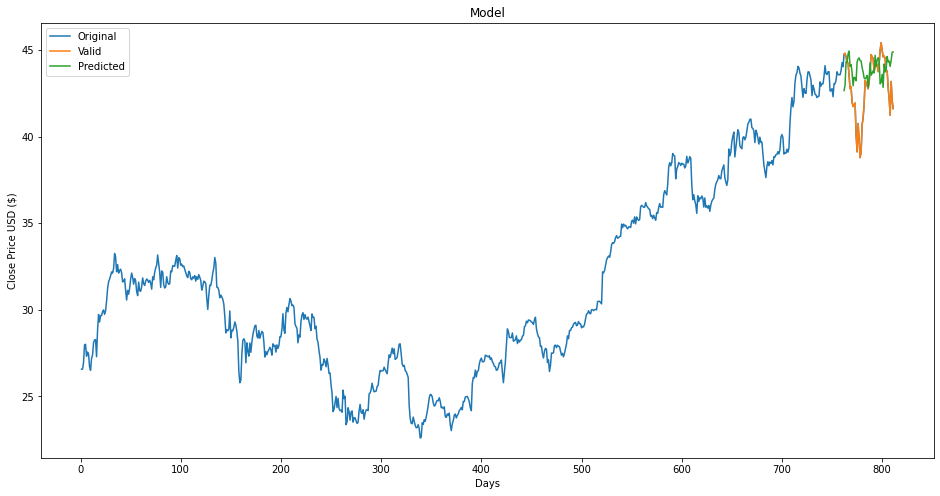

In [138]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [146]:
from sklearn import metrics
print(valid['Close'].corr(valid['Predictions']))
print(score(valid['Predictions'], valid['Close']))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(valid['Close'], valid['Predictions'])), 4))

-0.21090899036176425
0.46938775510204084
Root Mean Squared Error: 2.1414


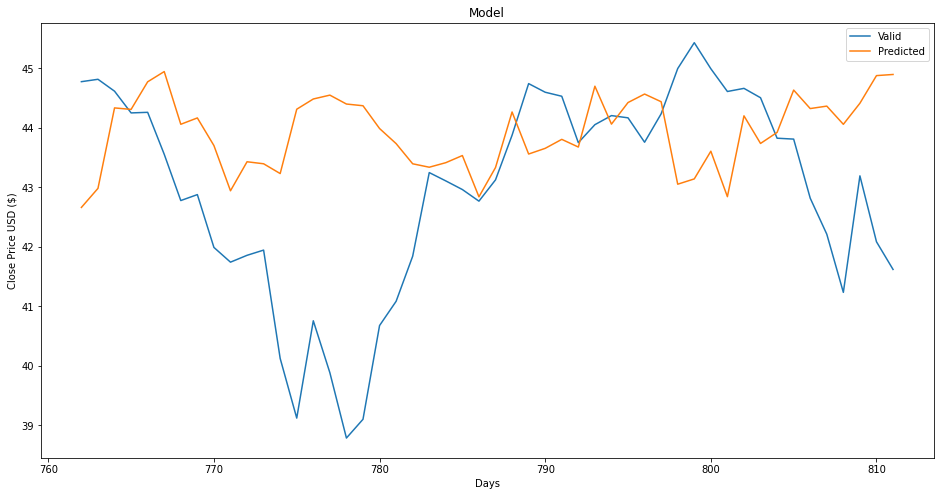

In [147]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ "Valid", 'Predicted'])
plt.show()

**Decision Tree**

In [148]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-148-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


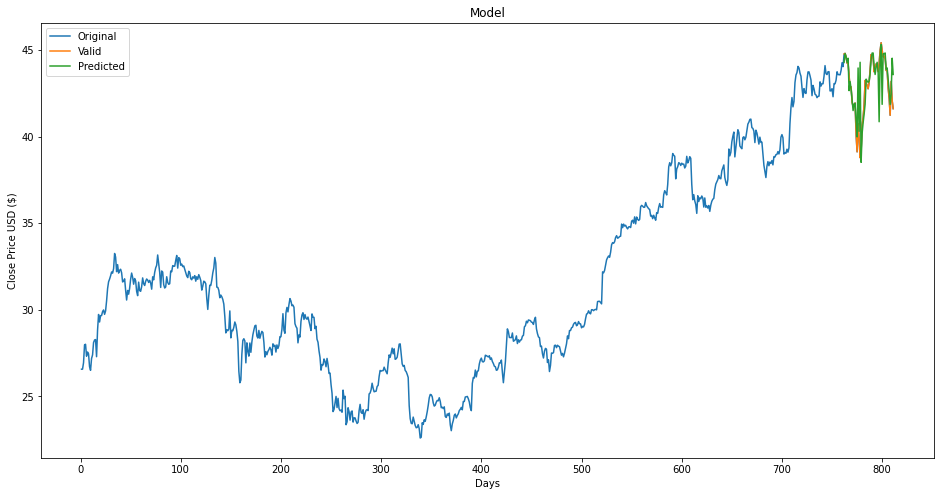

In [149]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

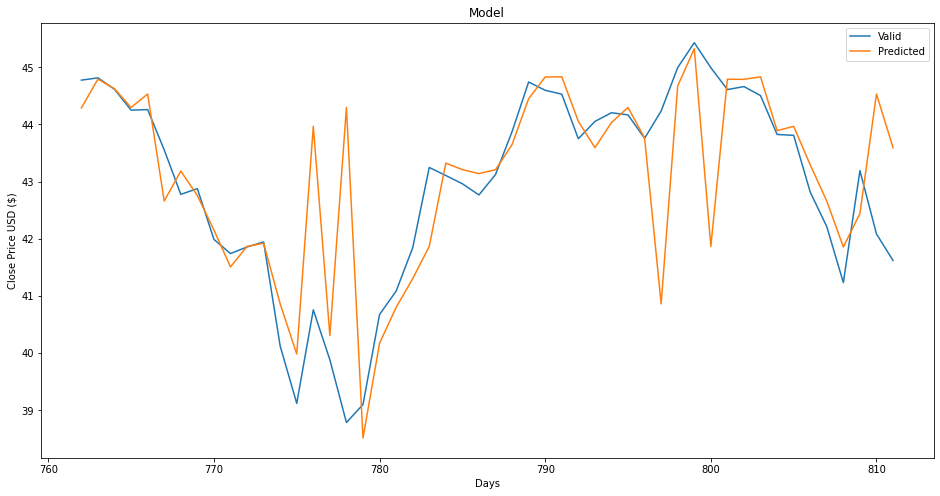

In [150]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
plt.show()

In [151]:
print(valid['Close'].corr(valid['Predictions']))
print(score(valid['Close'],valid['Predictions']))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(valid['Close'], valid['Predictions'])), 4))


0.704207874317966
0.6938775510204082
Root Mean Squared Error: 1.2647


**Random Forests**


In [152]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
randFor = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
randFor.fit(x_train, y_train)
predict = randFor.predict(x_test)



In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)


In [154]:
forest_prediction = randFor.predict(x_future)
print(forest_prediction)

[43.76167699 43.56504661 44.20085849 43.56114415 43.99482172 43.31813287
 42.98426943 42.95072254 42.63772242 42.55696674 42.66826543 42.62737191
 41.99180366 43.50792075 41.32641991 41.04118275 40.7578754  40.71175361
 41.34805312 42.12737469 43.15753997 43.50378682 43.23534597 43.09804964
 42.92900264 42.85929124 43.63181028 44.15163683 44.4362917  43.69210526
 43.36779383 43.28312335 43.30260781 42.50472816 43.17499537 43.33842503
 44.11381547 44.34553726 44.4778417  43.86931737 44.0675415  44.2020913
 43.7957799  43.55363779 43.22608087 42.67440124 43.19366823 42.79553452
 42.7535012  42.36743468]


In [156]:
predictions = forest_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-156-147e0e8a0ebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


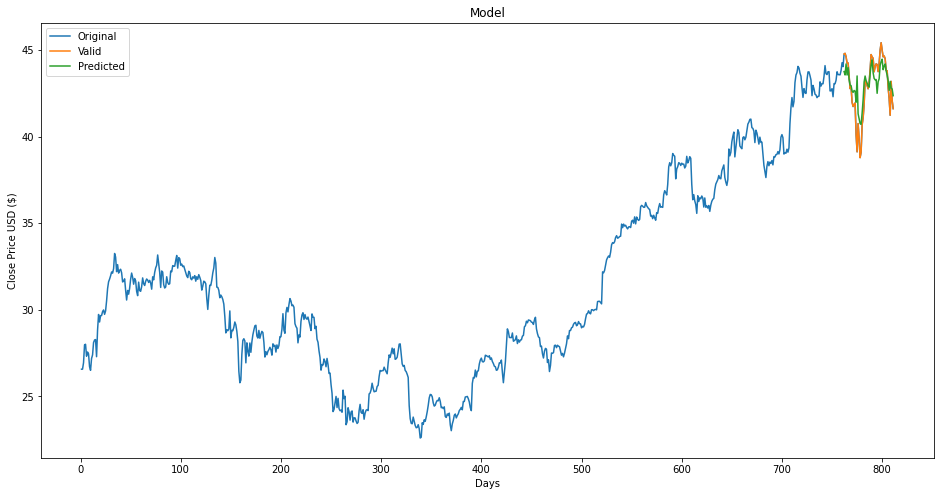

In [157]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

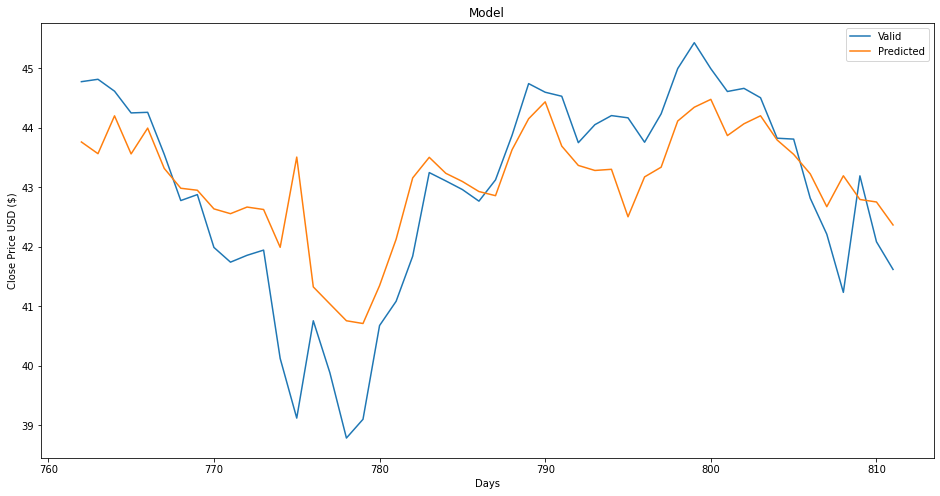

In [158]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Valid", 'Predicted'])
plt.show()

In [160]:
print(valid['Close'].corr(valid['Predictions']))
print(score(valid['Close'],valid['Predictions']))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(valid['Close'], valid['Predictions'])), 4))

0.8492097842621995
0.6938775510204082
Root Mean Squared Error: 1.0505
